In [56]:
!pip install python-calamine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.8/856.8 kB 13.0 MB/s eta 0:00:00


In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import linalg as LA

N:  [  130.           137.8          148.868        162.19608
   177.2335648    193.69183909   211.43317786   230.40747074
   250.61625124   272.0922957    294.88810299   319.06944281
   344.71179996   371.89847658   400.7196473    431.27196554
   463.65849294   497.98882191   534.37931828   572.95344259
   613.84212733   657.18419753   703.12682864   751.82603853
   803.44721295   858.16566462   916.16722727   977.64888589
  1042.81944528  1111.90023895  1185.12588065  1262.74506109
  1345.02139248  1432.23430384  1524.67998992  1622.67241719
  1726.54439011  1836.64868141  1953.3592302   2077.07241191
  2208.20838453  2347.21251551  2494.55689435  2650.74193592
  2816.29807998  2991.78759268  3177.80647615  3374.98649263
  3583.99731009  3805.5487766   4040.39333111  4289.32855888
  4553.19990032  4832.90352225  5129.38936149  5443.66435109
  5776.79584006  6129.91521837  6504.22175938  6900.98669285
  7321.55752232  7767.36260157  8239.91598557  8740.82257261
  9271.78355488  9834.6

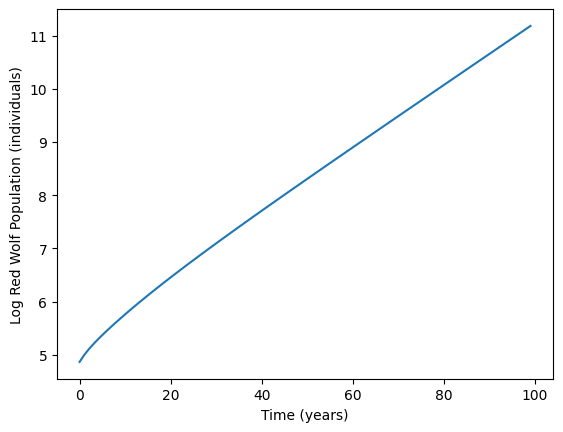

In [49]:
#Problem 1 Stuff

N = [130]
I = [0]
for t in range(1, 100):
  N.append(1.06 * N[-1] + 0.28 * I[-1])
  I.append(10 + 0.57 * I[-1])

N = np.array(N)
I = np.array(I)

print("N: ", N)
print("I: ", I)
print("N + I: ", N + I)

fig, ax = plt.subplots(1)
ax.plot(np.arange(100), np.log(N + I))
ax.set(xlabel="Time (years)", ylabel="Log Red Wolf Population (individuals)")
plt.show()

In [50]:
# Problem 2 Stuff

L = np.array([[1, 3 / 2], [2, 1 / 2]])
N0 = np.array([100, 200])

N = [N0]
for i in range(5):
  print(N[-1])
  N.append(np.dot(L, N[-1]))

[100 200]
[400. 300.]
[850. 950.]
[2275. 2175.]
[5537.5 5637.5]


51
(101,)


[Text(0.5, 80.7222222222222, 'Time (years)'),
 Text(87.72222222222221, 0.5, 'Population of 18-25 (individuals)')]

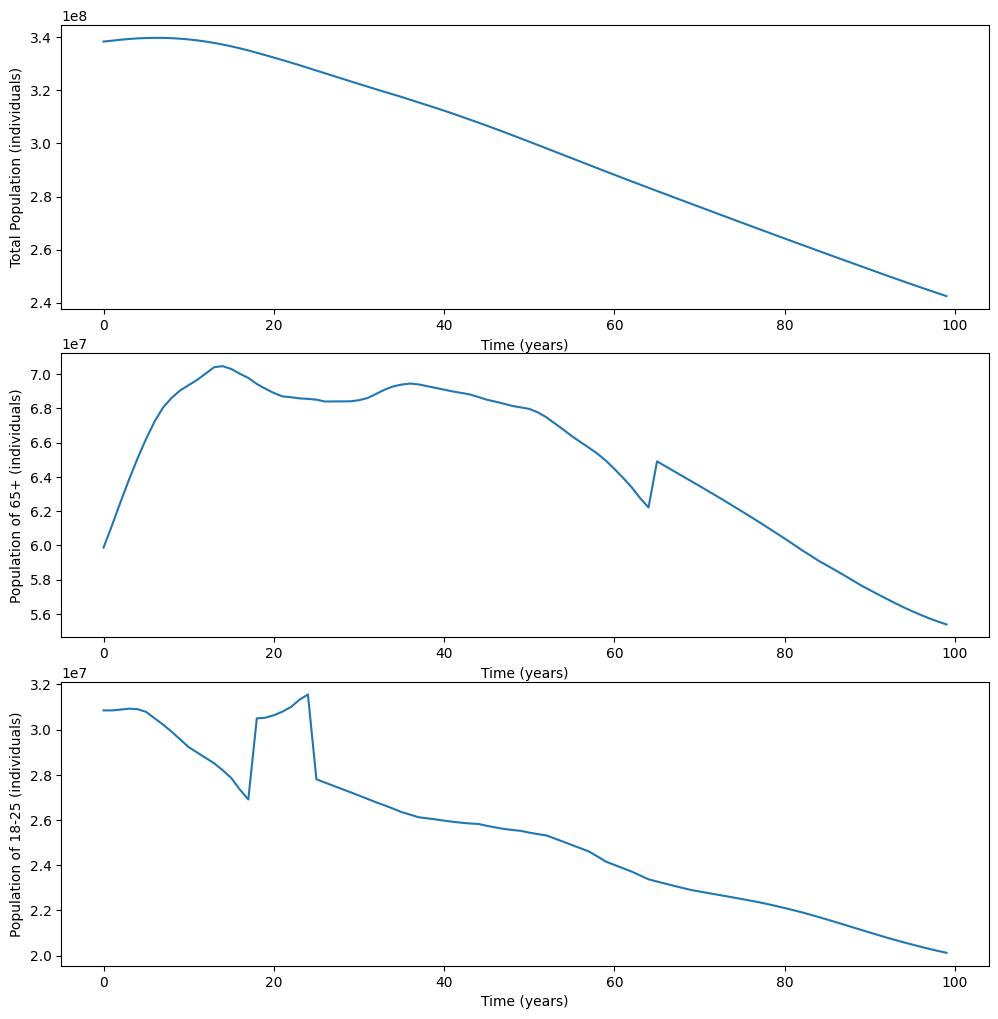

In [127]:
# Problem 5 Stuff

df = pd.read_excel("/table2.xlsx", engine = 'calamine')
birth_rate = df['birth rate'].to_numpy()
death_rate = df['death rate'].to_numpy()

# initialize a big enough array
L = np.zeros((101, 101))

# fill the first row with birth rates
for i in range(101):
  L[1, i] = birth_rate[i]

# fill in the death rates
for i in range(1, 101):
  L[i, i - 1] = 1 - death_rate[i - 1]

eigenvalues, eigenvectors = LA.eig(L)

# max eigenvalue
print(np.argmax(eigenvalues))

initial = df['2023_pop_percent'].to_numpy()
initial = np.multiply(initial, 338259155)

print(initial.shape)

pops = [initial]
for i in range(99):
  pops.append(np.dot(L, pops[-1]))

pops = np.array(pops)

fig, ax = plt.subplots(3, figsize=(10,10))
fig.tight_layout()
ax[0].plot(np.arange(100), np.sum(pops, axis=1))
ax[0].set(xlabel="Time (years)", ylabel="Total Population (individuals)")
ax[1].plot(np.arange(100), np.sum(pops[:,65:], axis=1))
ax[1].set(xlabel="Time (years)", ylabel="Population of 65+ (individuals)")
ax[2].plot(np.arange(100), np.sum(pops[:,18:25], axis=1))
ax[2].set(xlabel="Time (years)", ylabel="Population of 18-25 (individuals)")